# Esewa transaction EDA (Dummy data)


In [1]:
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
import squarify
import polars as pl

## Importing libaries for further analysis and EDA

In [2]:
files = ["2020.parquet","2021.parquet","2022.parquet",
         "2023.parquet","2024.parquet","2025.parquet","2026.parquet"]
all_dfs = []

for f in files:
    temp_df = pd.read_parquet(f,engine='pyarrow')
    # Extract year from filename and add as a column
    year = "".join(filter(str.isdigit, f)) 
    temp_df['source_year'] = year 
    all_dfs.append(temp_df)

data = pd.concat(all_dfs, ignore_index=True)

## Concatenating and adding new column for combining multiple parquet files


In [3]:
data = data.drop('current_balance', axis=1)

## The below cells shows information of the dataset like total no of unique users,transactions and dimensions etc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692588 entries, 0 to 3692587
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   account_id          object 
 1   transaction_id      object 
 2   transaction_date    object 
 3   transaction_amount  float64
 4   debit_credit        object 
 5   category_name       object 
 6   remarks             object 
 7   charge              float64
 8   available_balance   float64
 9   source_year         object 
dtypes: float64(3), object(7)
memory usage: 281.7+ MB


## Total column of dataset 


In [5]:
print('Total no of unique users from 2020-2026:',data['account_id'].nunique())

Total no of unique users from 2020-2026: 10000


### Total number of unique users using nunique()

In [6]:
data.head()

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year
0,A000003,9b42ae3c-e973-4724-872c-3f81f1abb3d3,2020-01-01,3027.0,credit,Transfer,Transfer transaction,0.0,7681.0,2020
1,A000012,03481f36-3c77-46b0-81fd-741195224382,2020-01-01,1050.0,debit,NEA Bill,NEA Bill transaction,5.0,1353.0,2020
2,A000013,45d5d507-94cc-446f-8909-da66ed4ad5c7,2020-01-01,2815.0,credit,Load,Load transaction,0.0,6803.0,2020
3,A000047,275b1ebd-a0ac-4a12-8b31-5c140f71c06b,2020-01-01,325.0,debit,Bus Ticket,Bus Ticket transaction,5.0,4117.0,2020
4,A000053,9c77a88f-6230-4c74-99a3-5074959f5d33,2020-01-01,1391.0,debit,NEA Bill,NEA Bill transaction,5.0,590.0,2020


In [7]:
print("Total number of transaction from 2020-2026:",data['transaction_id'].nunique())

Total number of transaction from 2020-2026: 3692588


In [8]:
print("Dimension of dataset:",data.shape)

Dimension of dataset: (3692588, 10)


In [9]:
print("Total category of services:\n",data['category_name'].unique())

Total category of services:
 ['Transfer' 'NEA Bill' 'Load' 'Bus Ticket' 'Movie Ticket' 'Mobile topup'
 'Data Pack service' 'Water Bill' 'QR' 'Internet Bill' 'Ride Sharing'
 'Government services' 'Education' 'Investment' 'Airplane Ticket']


In [10]:
category_map = {
    # Bill payment category
    "NEA Bill" : "Bill Payment",
    "Water Bill" : "Bill Payment",
    "Internet Bill" :"Bill Payment",
    # Transportation
    "Bus Ticket" : " Transportation",
    "Airplane Ticket" : "Transportation",
    "Ride Sharing" : "Transportation",
    # Mobile services
    "Mobile topup": "Mobile Services",
    'Data Pack service' : "Mobile Services",
    # Entertainment
    'Movie Ticket' : "Entertainment",
    # Goverment Services
    'Government services' : "Government Services",
    # Education
    'Education' : 'Education',
    # QR
    'QR':'QR',
    # Transfer
    'Transfer' : 'Transfer',
    # Load
    'Load' : 'Load',
    # Investment
    'Investment' : 'Investment'    
}

#### The below cell shows total share of categories in total transaction amount revenue earned from customers and total number of transactions made from 2020- 2026

In [11]:
category_count = data.groupby('category_name').agg(
    transaction_count_per_category=('transaction_amount', 'count'),
    transaction_amount_per_category=('transaction_amount', 'sum'),
    revenue_per_category=('charge', 'sum') 
).reset_index()
category_count.columns = ['category_name','transaction_count_per_category','transaction_amount_per_category','revenue_per_category']


In [12]:
data['category_name']=data['category_name'].map(category_map)

In [13]:
category_count = category_count.sort_values(by=['transaction_amount_per_category','category_name'],ascending=False)

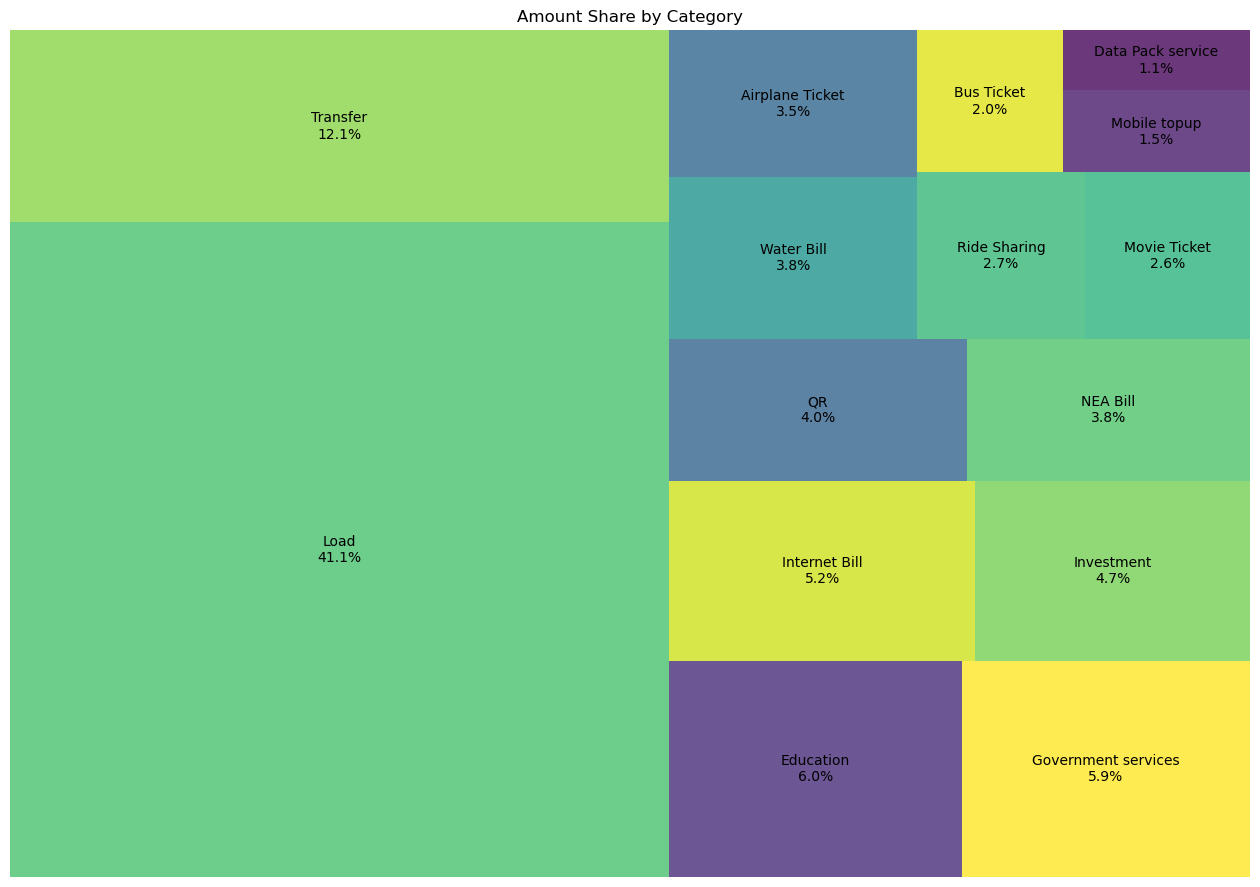

In [14]:
category_count['category_share_amount'] = (category_count['transaction_amount_per_category']/(data['transaction_amount'].sum()))*100
labels = [
    f"{cat}\n{share:.1f}%"
    for cat,share in zip(
        category_count["category_name"],
        category_count["category_share_amount"]
    )
]
plt.figure(figsize = (16,11))
squarify.plot(
    sizes = category_count["category_share_amount"],
    label = labels,
    text_kwargs = {"fontsize": 10},
    alpha = 0.8
)


plt.title("Amount Share by Category")
plt.axis("off")
plt.show()

## From this Treemap  chart we understand that top 3 categories by transaction amount is load, transfer and education and their shares in total transaction amount.

In [15]:
category_count = category_count.sort_values(by=['transaction_count_per_category','category_name'],ascending=False)

## Total transaction per category 

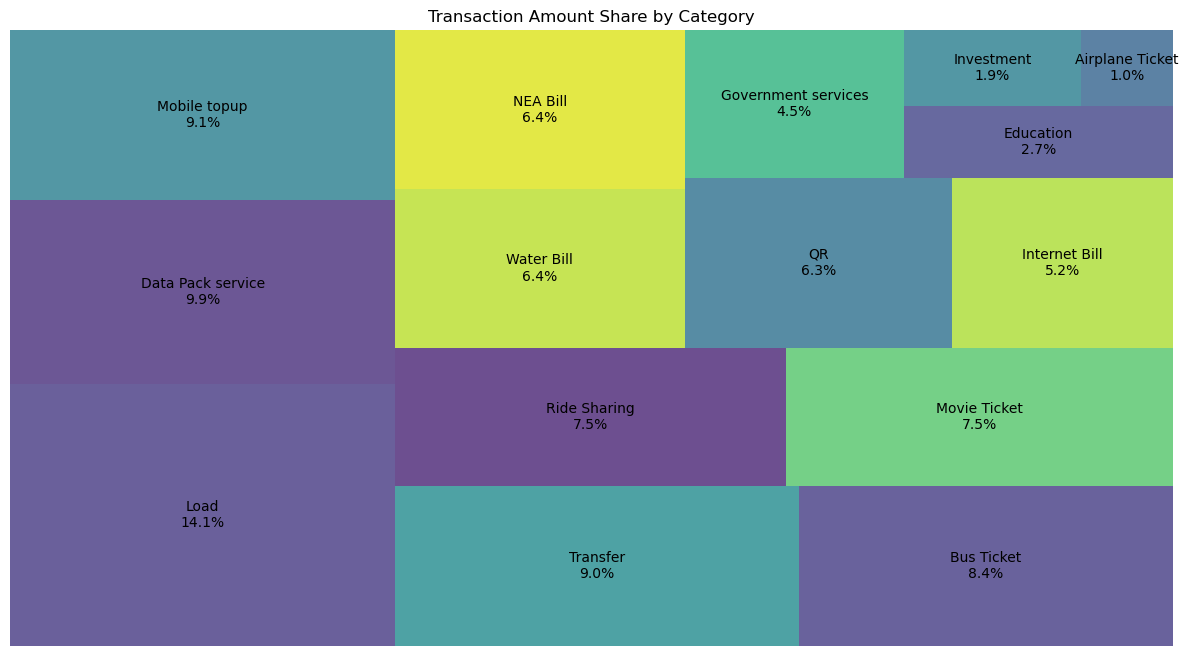

In [16]:
category_count['category_share_count'] = (category_count['transaction_count_per_category']/(data['transaction_id'].nunique()))*100
labels = [
    f"{cat}\n{share:.1f}%"
    for cat,share in zip(
        category_count["category_name"],
        category_count["category_share_count"]
    )
]
plt.figure(figsize = (15,8))
squarify.plot(
    sizes = category_count["category_share_count"],
    label = labels,
    text_kwargs = {"fontsize": 10},
    alpha = 0.8
)


plt.title("Transaction Amount Share by Category")
plt.axis("off")
plt.show()


#### From above Treemap chart we know top 3 categories where user have made most transaction from 2020-2026 are Load, Data pack services and mobile topup

## This shows the total share of a category by whole transaction amount 

In [17]:
category_count = category_count.sort_values(by=['revenue_per_category','category_name'],ascending=False)

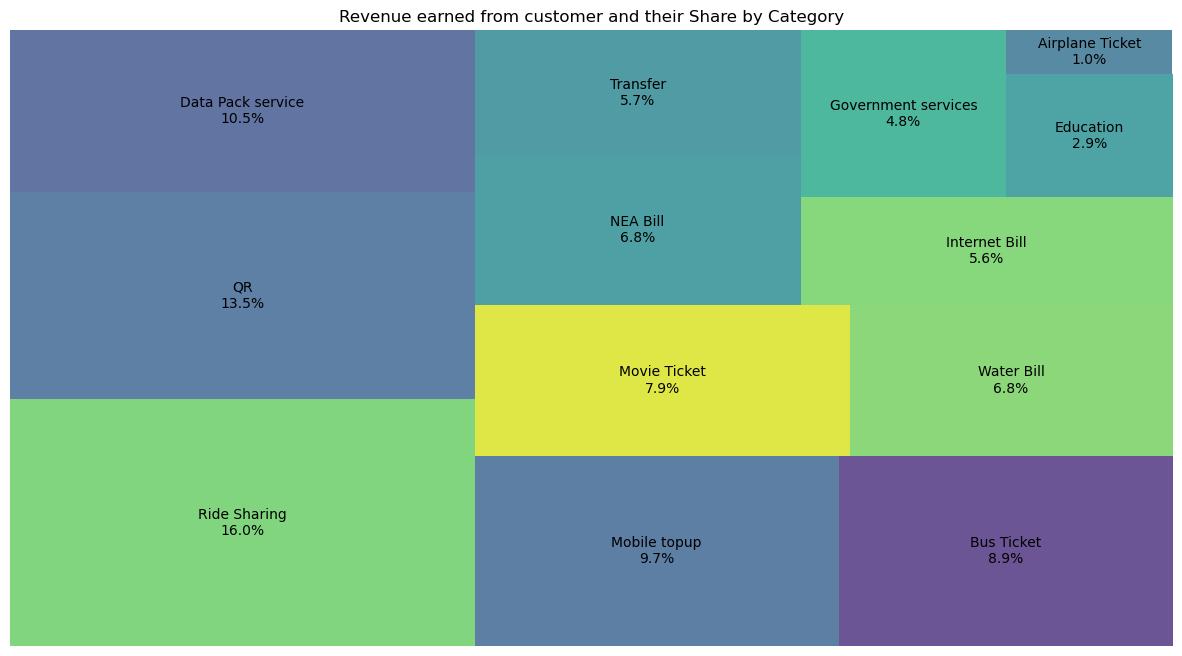

In [18]:
category_count = category_count[category_count['revenue_per_category'] > 0]
category_count['category_share_revenue'] = (category_count['revenue_per_category']/(data['charge'].sum()))*100
labels = [
    f"{cat}\n{share:.1f}%"
    for cat,share in zip(
        category_count["category_name"],
        category_count["category_share_revenue"]
    )
]
plt.figure(figsize = (15,8))
squarify.plot(
    sizes = category_count["category_share_revenue"],
    label = labels,
    text_kwargs = {"fontsize": 10},
    alpha = 0.8
)


plt.title("Revenue earned from customer and their Share by Category")
plt.axis("off")
plt.show()


In [19]:
category_count.to_csv('category.csv')

#### From the above charts we know the total contribution of each category in total transaction count amount and revenue earned from customer


# Data Validation and Testing
### This was performed to ensure transactions of different categories are valid 

In [20]:
data[(data["category_name"] == "MObile Topup") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [21]:
# data[(data["category_name"] == "Transfer") & (data["debit_credit"] == "credit")].head(2)
data[(data["category_name"] == "Transfer") & (data["debit_credit"] == "debit")].head(2)

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year
31,A000212,767180ee-b676-42fd-9e61-1401f1f04376,2020-01-01,1401.0,debit,Transfer,Transfer transaction,10.0,1528.0,2020
119,A000565,eb85138d-1ed5-4ab6-ba96-bd695ff26fc7,2020-01-01,791.0,debit,Transfer,Transfer transaction,10.0,2343.0,2020


In [22]:
data[(data["category_name"] == "Bus Ticket") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [23]:
data[(data["category_name"] == "Ride Sharing") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [24]:
data[(data["category_name"] == "Movie Ticket") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [25]:
data[(data["category_name"] == "NEA BIll") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [26]:
data[(data["category_name"] == "Load") & (data["debit_credit"] == "debit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [27]:
data[(data["category_name"] == "QR") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [28]:
data[(data["category_name"] == "Inetrnet Bill") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [29]:
data[(data["category_name"] == "Goverment Services") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [30]:
data[(data["category_name"] == "Education") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [31]:
data[(data["category_name"] == "Airplane Ticket") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


In [32]:
data[(data["category_name"] == "Investment") & (data["debit_credit"] == "credit")]

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year


##### perform sanity test for categories ensuring all transactions are valid meaning this test ensures if categories are in right cashflow order.


### Grouping user id and transaction count to find top 3 users from 2020-2026 who has performed the most number of  transaction.

In [33]:
per_user_transaction_count = data.groupby("account_id").agg(
    transaction_count=("transaction_id", "count"),
    top_3_categories=("category_name", lambda x: x.value_counts().index[:3])
).reset_index()
per_user_transaction_count.columns = ['account_id','transaction_count','top_category']
print('Top 3 account holder with most transaction from 2020-2026:')
per_user_transaction_count.sort_values(by = 'transaction_count',ascending = False).head(3)


Top 3 account holder with most transaction from 2020-2026:


,account_id,transaction_count,top_category
8722,A008723,762,"[Mobile Services, Bill Payment, Load]"
7876,A007877,751,"[Mobile Services, Bill Payment, Load]"
5250,A005251,734,"[Mobile Services, Bill Payment, Load]"


In [34]:
per_user_transaction_amount = (data.groupby("account_id")["transaction_amount"].sum().reset_index(name='transaction_amount'))
per_user_transaction_amount.columns = ['account_id','transaction_amount']
print('Top 3 account holder with most amount transaction from 2020-2026:')
per_user_transaction_amount.sort_values(by = 'transaction_amount',ascending = False).head(3)
per_user_transaction_amount.head()

Top 3 account holder with most amount transaction from 2020-2026:


,account_id,transaction_amount
0,A000001,974497.0
1,A000002,898895.0
2,A000003,751993.0
3,A000004,528412.0
4,A000005,775327.0


In [35]:
average_transaction_per_user = per_user_transaction_count['transaction_count'].mean()

In [36]:
print("Average transaction count per user from 2025-2026:",average_transaction_per_user)

Average transaction count per user from 2025-2026: 369.2588


In [37]:
user_revenue = data.groupby("account_id")["charge"].sum()
total_revenue_from_customers = data['charge'].sum()
print("Total revenue earned from customers from 2020-2026:",total_revenue_from_customers)

Total revenue earned from customers from 2020-2026: 17396285.0


In [38]:
revenue_earned_from_customers_per_year = data.groupby('source_year')['charge'].sum().reset_index(name='revenue_earned_from_customers_per_year')
revenue_earned_from_customers_per_year


,source_year,revenue_earned_from_customers_per_year
0,2020,2963570.0
1,2021,2875900.0
2,2022,2879785.0
3,2023,2877645.0
4,2024,2887615.0
5,2025,2884365.0
6,2026,27405.0


### This table shows annual revenue earned by esewa from its customers per year

In [39]:
filter = data[data['source_year']!= '2026']
yearly_revenue = (filter.groupby('source_year')['charge']
    .sum().reset_index(name='revenue_from_customers').sort_values(by = ['source_year']))
yearly_revenue['growth rate'] = (
    yearly_revenue['revenue_from_customers'].pct_change()*100
)
yearly_revenue.head()

,source_year,revenue_from_customers,growth rate
0,2020,2963570.0,NaN
1,2021,2875900.0,-2.958256
2,2022,2879785.0,0.135088
3,2023,2877645.0,-0.074311
4,2024,2887615.0,0.346464


In [40]:
yearly_revenue.head(24)

,source_year,revenue_from_customers,growth rate
0,2020,2963570.0,NaN
1,2021,2875900.0,-2.958256
2,2022,2879785.0,0.135088
3,2023,2877645.0,-0.074311
4,2024,2887615.0,0.346464
5,2025,2884365.0,-0.112550


Text(0.5, 1.0, 'Annual Revenue growth rate from 2020-2025')

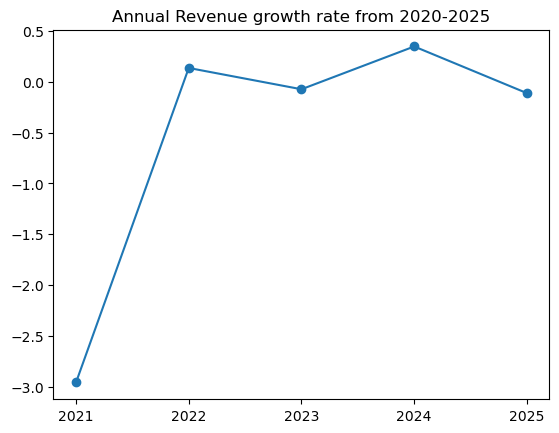

In [41]:
plt.plot(yearly_revenue['source_year'],yearly_revenue['growth rate'],marker='o')
plt.title('Annual Revenue growth rate from 2020-2025')
# year_data.head()

In [42]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['month'] = data['transaction_date'].dt.month
data['year_month'] = pd.to_datetime(
    data['source_year'].astype(str) + '-' +
    data['month'].astype(str) + '-01'
)

### This line chart shows annual growth rate of revenue of eSewa but 2026 is excluded because it only has transaction of 1st month

In [43]:
data.head()

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year,month,year_month
0,A000003,9b42ae3c-e973-4724-872c-3f81f1abb3d3,2020-01-01,3027.0,credit,Transfer,Transfer transaction,0.0,7681.0,2020,1,2020-01-01
1,A000012,03481f36-3c77-46b0-81fd-741195224382,2020-01-01,1050.0,debit,Bill Payment,NEA Bill transaction,5.0,1353.0,2020,1,2020-01-01
2,A000013,45d5d507-94cc-446f-8909-da66ed4ad5c7,2020-01-01,2815.0,credit,Load,Load transaction,0.0,6803.0,2020,1,2020-01-01
3,A000047,275b1ebd-a0ac-4a12-8b31-5c140f71c06b,2020-01-01,325.0,debit,Transportation,Bus Ticket transaction,5.0,4117.0,2020,1,2020-01-01
4,A000053,9c77a88f-6230-4c74-99a3-5074959f5d33,2020-01-01,1391.0,debit,Bill Payment,NEA Bill transaction,5.0,590.0,2020,1,2020-01-01


In [44]:
ARPU = user_revenue.mean()
print('Avg revenue earned from a customer from 2020-2026:',ARPU)

Avg revenue earned from a customer from 2020-2026: 1739.6285


### This shows total revenue earned by esewa through their customers through their charges 

In [45]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['month'] = data['transaction_date'].dt.strftime('%b')
data['year_month'] = data['transaction_date'].dt.strftime('%b-%Y')


In [46]:
print('Total debit and credit category count form 2020-2026:\n',data['debit_credit'].value_counts())

Total debit and credit category count form 2020-2026:
 debit_credit
debit     2936786
credit     755802
Name: count, dtype: int64


<Axes: ylabel='count'>

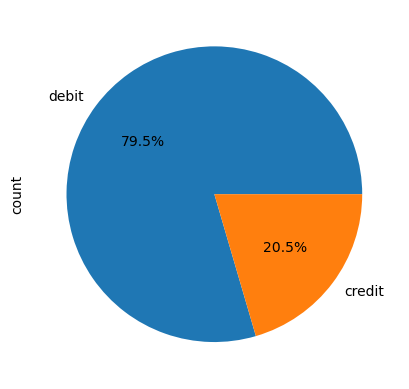

In [47]:
data['debit_credit'].value_counts().plot.pie(autopct='%1.1f%%')

In [56]:
print("Total spending of total users from 2020-2026: ",data.loc[data['debit_credit'] =="debit",'transaction_amount'].sum())

Total spending of total users from 2020-2026:  3500360903.0


In [57]:
print('Total transaction amount from 2020-2026:',data['transaction_amount'].sum())

Total transaction amount from 2020-2026: 7013615602.0


In [58]:
year = ["2020","2021","2022","2023","2024","2025","2026"]
spending_year = {}
for yr in year:
    filter_data = data[(data['debit_credit']=="debit") & (data['source_year']==yr)]
    spending_year[yr] = filter_data.groupby("account_id")["transaction_amount"].sum().mean()
    print(f"Average spending of{yr} per user = {spending_year[yr]}")

Average spending of2020 per user = 59021.9347
Average spending of2021 per user = 58237.045044141254
Average spending of2022 per user = 58355.76677700873
Average spending of2023 per user = 58388.48357279212
Average spending of2024 per user = 58271.969493226294
Average spending of2025 per user = 58265.21900080257
Average spending of2026 per user = 1771.0053691275168


In [59]:
print('Avg spending per user from 2020-2026:',data[(data['debit_credit']=="debit")].groupby("account_id")["transaction_amount"].sum().mean())

Avg spending per user from 2020-2026: 350036.0903


Text(0, 0.5, 'Amount')

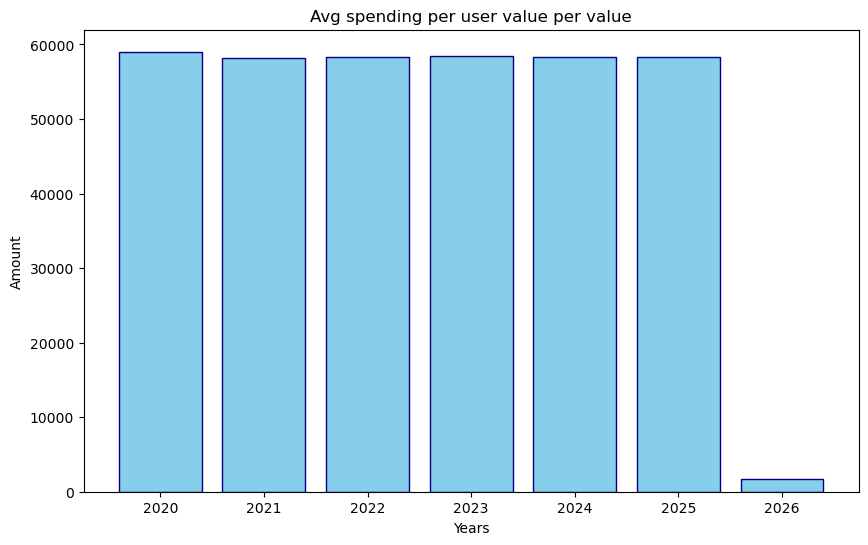

In [60]:
years_list = list(spending_year.keys())
averages = list(spending_year.values())
plt.figure(figsize=(10, 6))
plt.bar(years_list, averages, color='skyblue', edgecolor='navy')
plt.title('Avg spending per user value per value')
plt.xlabel('Years')
plt.ylabel("Amount")

### This shows the average spending per user of each year

In [61]:
year = ["2020","2021","2022","2023","2024","2025","2026"]
load = {}
for yr in year:
    filter_data = data[(data['debit_credit']=="credit") & (data['source_year']==yr)]
    load[yr] = filter_data.groupby("account_id")["transaction_amount"].sum().mean()
    print(f"Average Load and credit transfer of{yr} per user = {load[yr]}")

Average Load and credit transfer of2020 per user = 59473.85767714545
Average Load and credit transfer of2021 per user = 59037.345912585995
Average Load and credit transfer of2022 per user = 59060.33464527198
Average Load and credit transfer of2023 per user = 59156.05813246911
Average Load and credit transfer of2024 per user = 59031.92148133158
Average Load and credit transfer of2025 per user = 59056.17464817252
Average Load and credit transfer of2026 per user = 4765.356373429085


In [62]:
print('Avg load and credit transfer per user from 2020-2026:',data[(data['debit_credit']=="credit")].groupby("account_id")["transaction_amount"].sum().mean())

Avg load and credit transfer per user from 2020-2026: 351325.4699


Text(0, 0.5, 'Amount')

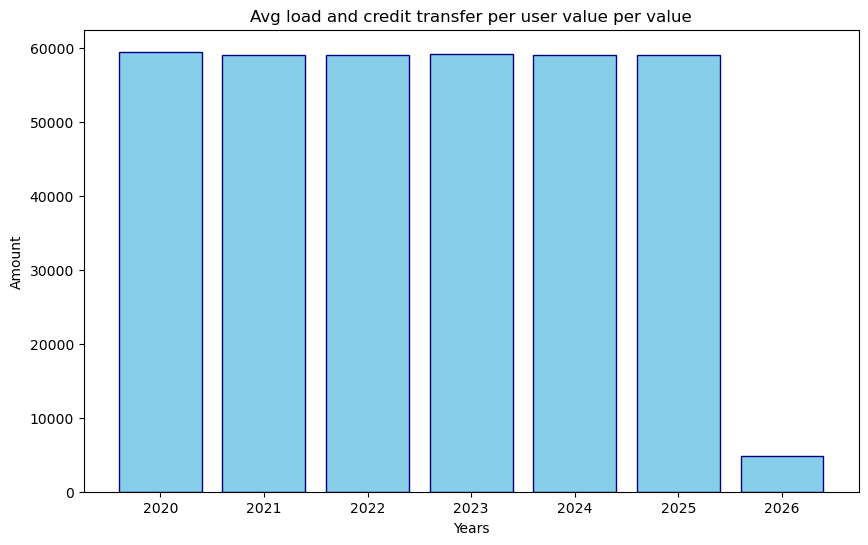

In [63]:
years_list = list(load.keys())
averages = list(load.values())
plt.figure(figsize=(10, 6))
plt.bar(years_list, averages, color='skyblue', edgecolor='navy')
plt.title('Avg load and credit transfer per user value per value')
plt.xlabel('Years')
plt.ylabel("Amount")

## This graph shows average amount loaded or credit transfer per user by per year

In [64]:
data.head()

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year,month,year_month
0,A000003,9b42ae3c-e973-4724-872c-3f81f1abb3d3,2020-01-01,3027.0,credit,Transfer,Transfer transaction,0.0,7681.0,2020,Jan,Jan-2020
1,A000012,03481f36-3c77-46b0-81fd-741195224382,2020-01-01,1050.0,debit,Bill Payment,NEA Bill transaction,5.0,1353.0,2020,Jan,Jan-2020
2,A000013,45d5d507-94cc-446f-8909-da66ed4ad5c7,2020-01-01,2815.0,credit,Load,Load transaction,0.0,6803.0,2020,Jan,Jan-2020
3,A000047,275b1ebd-a0ac-4a12-8b31-5c140f71c06b,2020-01-01,325.0,debit,Transportation,Bus Ticket transaction,5.0,4117.0,2020,Jan,Jan-2020
4,A000053,9c77a88f-6230-4c74-99a3-5074959f5d33,2020-01-01,1391.0,debit,Bill Payment,NEA Bill transaction,5.0,590.0,2020,Jan,Jan-2020


In [65]:
user_monthly_activity = (data.groupby(['source_year','month','account_id']).size().reset_index(name = "transaction_count"))
user_monthly_activity['active'] = 1

In [66]:
user_monthly_activity[user_monthly_activity['account_id'] == "A000001"].head(60)

,source_year,month,account_id,transaction_count,active
0,2020,Apr,A000001,3,1
8192,2020,Aug,A000001,7,1
16341,2020,Dec,A000001,7,1
24490,2020,Feb,A000001,1,1
33021,2020,Jan,A000001,1,1
42474,2020,Jul,A000001,8,1
50641,2020,Jun,A000001,6,1
58754,2020,Mar,A000001,10,1
67094,2020,May,A000001,11,1
75245,2020,Nov,A000001,23,1


In [67]:
mau = (
    user_monthly_activity
    .groupby(['source_year', 'month'])['active']
    .sum()
    .reset_index(name='MAU')
)

In [68]:
mau['date'] = pd.to_datetime(
    mau['source_year'].astype(str) + '-' +
    mau['month'].astype(str) + '-01'
)

In [69]:
mau = mau.sort_values('date').reset_index(drop=True)

In [70]:
mau['MAU_growth_rate'] = (
    mau['MAU'].pct_change() * 100
).round(2)
mau.head()

,source_year,month,MAU,date,MAU_growth_rate
0,2020,Jan,9453,2020-01-01,NaN
1,2020,Feb,8531,2020-02-01,-9.75
2,2020,Mar,8340,2020-03-01,-2.24
3,2020,Apr,8192,2020-04-01,-1.77
4,2020,May,8151,2020-05-01,-0.50


In [71]:
filter = mau[mau['date'] < '2026-01-01']

Text(0, 0.5, 'MAU growth rate')

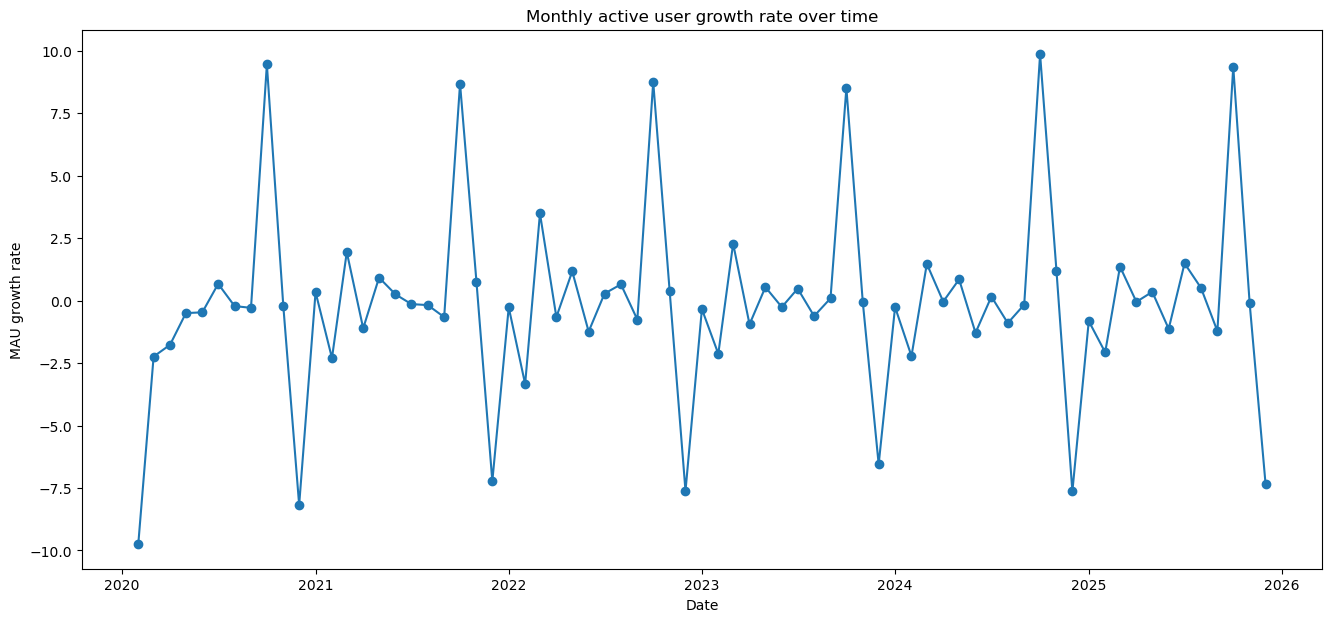

In [72]:
plt.figure(figsize = (16,7))
plt.plot(filter['date'], filter['MAU_growth_rate'], marker='o')
plt.title("Monthly active user growth rate over time")
plt.xlabel("Date")
plt.ylabel("MAU growth rate")

In [73]:
mau.to_csv('MAU.csv')

In [74]:
data.groupby('source_year')["transaction_id"].count()

source_year
2020    626153
2021    611115
2022    611684
2023    611805
2024    613279
2025    612711
2026      5841
Name: transaction_id, dtype: int64

In [76]:
data.head()

,account_id,transaction_id,transaction_date,transaction_amount,debit_credit,category_name,remarks,charge,available_balance,source_year,month,year_month
0,A000003,9b42ae3c-e973-4724-872c-3f81f1abb3d3,2020-01-01,3027.0,credit,Transfer,Transfer transaction,0.0,7681.0,2020,Jan,Jan-2020
1,A000012,03481f36-3c77-46b0-81fd-741195224382,2020-01-01,1050.0,debit,Bill Payment,NEA Bill transaction,5.0,1353.0,2020,Jan,Jan-2020
2,A000013,45d5d507-94cc-446f-8909-da66ed4ad5c7,2020-01-01,2815.0,credit,Load,Load transaction,0.0,6803.0,2020,Jan,Jan-2020
3,A000047,275b1ebd-a0ac-4a12-8b31-5c140f71c06b,2020-01-01,325.0,debit,Transportation,Bus Ticket transaction,5.0,4117.0,2020,Jan,Jan-2020
4,A000053,9c77a88f-6230-4c74-99a3-5074959f5d33,2020-01-01,1391.0,debit,Bill Payment,NEA Bill transaction,5.0,590.0,2020,Jan,Jan-2020


In [88]:
user_month = (data[['account_id', 'year_month']])
user_month['year_month'] = pd.to_datetime(user_month['year_month'])
user_month['year_month'] = user_month['year_month'].dt.to_period('M')

/tmp/ipykernel_418/4088673632.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_month['year_month'] = pd.to_datetime(user_month['year_month'])
/tmp/ipykernel_418/4088673632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_month['year_month'] = pd.to_datetime(user_month['year_month'])
/tmp/ipykernel_418/4088673632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [89]:
user_month['next_month'] = user_month['year_month'] + 1

/tmp/ipykernel_418/3156682961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_month['next_month'] = user_month['year_month'] + 1


In [90]:
user_month.head()

,account_id,year_month,next_month
0,A000003,2020-01,2020-02
1,A000012,2020-01,2020-02
2,A000013,2020-01,2020-02
3,A000047,2020-01,2020-02
4,A000053,2020-01,2020-02


In [91]:
retained = user_month.merge(
    user_month,
    left_on=['account_id', 'next_month'],
    right_on=['account_id', 'year_month'],
    how='left',
    suffixes=('_curr', '_next')
)

In [92]:
retained.head()

,account_id,year_month_curr,next_month_curr,year_month_next,next_month_next
0,A000003,2020-01,2020-02,2020-02,2020-03
1,A000003,2020-01,2020-02,2020-02,2020-03
2,A000003,2020-01,2020-02,2020-02,2020-03
3,A000003,2020-01,2020-02,2020-02,2020-03
4,A000003,2020-01,2020-02,2020-02,2020-03


In [93]:
retention_data = []

months = sorted(user_month['year_month'].unique())

for i in range(len(months) - 1):
    curr_users = set(
        user_month[user_month['year_month'] == months[i]]['account_id']
    )
    next_users = set(
        user_month[user_month['year_month'] == months[i+1]]['account_id']
    )

    retained = curr_users & next_users

    retention_data.append({
        'cohort_month': months[i],
        'active_users': len(curr_users),
        'retained_users': len(retained),
        'retention_rate_pct': round(len(retained) / len(curr_users) * 100, 2)
    })
retention_data = pd.DataFrame(retention_data)

In [94]:
retention_data.head(20)


,cohort_month,active_users,retained_users,retention_rate_pct
0,2020-01,9453,8139,86.10
1,2020-02,8531,7395,86.68
2,2020-03,8340,7212,86.47
3,2020-04,8192,7115,86.85
4,2020-05,8151,7062,86.64
5,2020-06,8113,7095,87.45
6,2020-07,8167,7112,87.08
7,2020-08,8149,7123,87.41
8,2020-09,8125,7601,93.55
9,2020-10,8893,8190,92.09
